In [1]:
from google.colab.drive import mount
mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd drive/MyDrive/UIRS_sem7

/content/drive/MyDrive/UIRS_sem7


In [3]:
!pip install pyyaml==5.1
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 4.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=5d7eab0510a722934144962e4692222c3cd95d00cf771ae78682c95d5eae3f54
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/

In [4]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
# After this step it will ask you to restart the runtime, please do it.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.3 MB 904 kB/s 
     |████████████████████████████████| 79 kB 4.1 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 130 kB 29.1 MB/s 
     |████████████████████████████████| 151 kB 58.2 MB/s 
     |████████████████████████████████| 843 kB 65.6 MB/s 
     |████████████████████████████████| 117 kB 78.7 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=79f85ae62e085ea69c8007588f8bf967c432cd1849b1719387ed91b2bf1c2638
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144576 sha256=d538097cd5ae73dfeff

In [2]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer

In [3]:
classes = ['asphalt', 'tile', 'snowy_dirt', 'snow', 'dirty_tile', 'icy_tile']

MetadataCatalog.get("category").set(thing_classes=classes, thing_colors = [
        (255,255,0),(0,0,255),(0,255,0),(255,0,255), (180,165,0), (187,132,156)]) #Done by me
  
    

microcontroller_metadata = MetadataCatalog.get("category")

In [4]:
cfg_instance_seg = get_cfg()
cfg_instance_seg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_instance_seg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg_instance_seg.MODEL.WEIGHTS = os.path.join("output", "model_final.pth")
cfg_instance_seg.MODEL.ROI_HEADS.NUM_CLASSES = 6
cfg.DATASETS.TEST = ("DATA/test")
predictor = DefaultPredictor(cfg_instance_seg)

In [5]:
class MyVisualizer(Visualizer):
    def _jitter(self, color ):
        return color

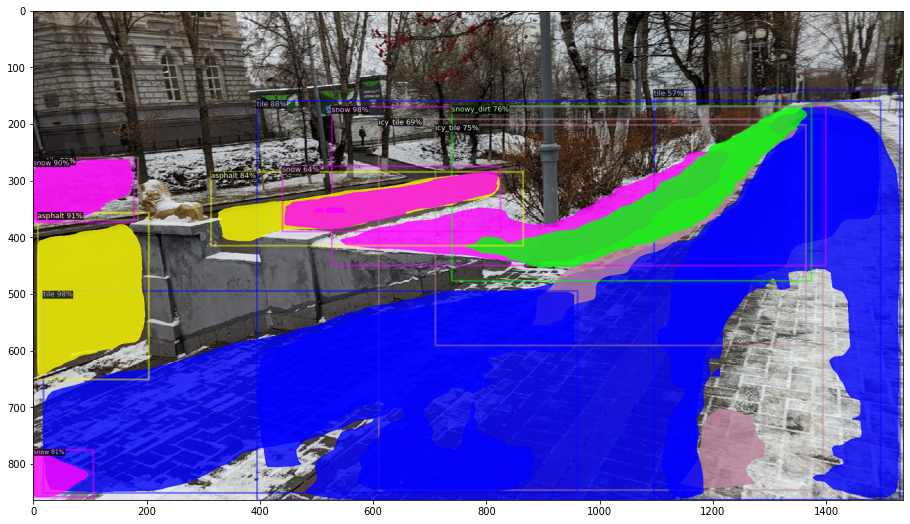

In [6]:
img = cv2.imread('DATA/test/176.jpg')
outputs = predictor(img)
v = MyVisualizer(img[:, :, ::-1],
                metadata=microcontroller_metadata, 
                scale=0.8, 
                instance_mode=ColorMode.SEGMENTATION, # removes the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (16, 9))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()